In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import json

In [35]:
diffexp_path = Path("../data/p7-vs-empty.diffexp.tsv")
df = pd.read_csv(diffexp_path, sep=" ")
df["padj"] = df["padj"].fillna(1)

tpm_path = Path("../data/merged_tpm.tsv")
tpm = pd.read_csv(tpm_path, sep="\t").set_index("FEATURE_ID")

In [36]:
z_score = tpm.apply(stats.zscore, axis=1, result_type="expand").dropna()
z_score.columns = tpm.columns

In [23]:
z_score

pDG_M-1   pDG_M-2  pDG7_M-1  pDG7_M-2
FEATURE_ID                                             
HIS92_RS00005   -1.575221  1.083315  0.580708 -0.088803
HIS92_RS00010    0.535972  0.715193 -1.725247  0.474083
HIS92_RS00015    0.150021  1.228504 -1.560499  0.181974
HIS92_RS00020   -0.711510 -0.780306  1.687215 -0.195400
HIS92_RS00025   -1.096158 -0.811884  1.353376  0.554667
...                   ...       ...       ...       ...
HIS92_RS26240    0.787979  1.191508 -1.000113 -0.979374
HIS92_RS26245    0.847004  1.141549 -1.028038 -0.960515
HIS92_RS26250    0.770651  1.205040 -1.021743 -0.953948
HIS92_RS24925.0  0.868906  1.121332 -1.054672 -0.935567
HIS92_RS24925.1  0.865661  1.125052 -1.036712 -0.954000

[5249 rows x 4 columns]

D:\programs\anaconda\envs\mag-app\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


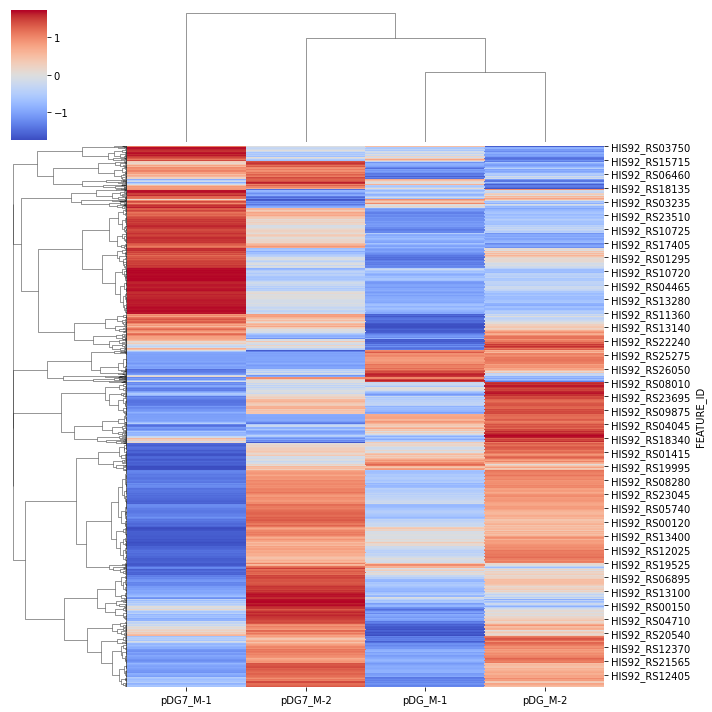

In [37]:
g = sns.clustermap(z_score, metric="correlation", method="complete", cmap=sns.color_palette("coolwarm", as_cmap=True))

In [31]:
psns.color_palette("coolwarm", n_colors=30)

[(0.26638146835294113, 0.35330440842352945, 0.8016373194980392),
 (0.3041742870039216, 0.40694488283921565, 0.8452627266980393),
 (0.34327752343529416, 0.45935363472941176, 0.8841219216235294),
 (0.38885187195294113, 0.5162984355764706, 0.9213734830823529),
 (0.4305068882509804, 0.5648827414588236, 0.9488894191803922),
 (0.4730701729882353, 0.6110774376156862, 0.970633588262745),
 (0.5162603025411764, 0.6544976105882353, 0.9864073998117647),
 (0.5651815812235294, 0.6994384449411764, 0.9966350701176471),
 (0.6085473603411764, 0.7357252298235294, 0.9993538252980392),
 (0.6513978391568627, 0.7681214866470587, 0.9958911501294118),
 (0.6933212848235294, 0.7963141317058823, 0.9863077805294118),
 (0.7388259949411764, 0.8225716218235294, 0.9682610638235294),
 (0.777377532854902, 0.8409212149490196, 0.9461493015921568),
 (0.8136925818823529, 0.8542818385490196, 0.9184801025098039),
 (0.8473649056117647, 0.8624724823764706, 0.885540470364706),
 (0.8836871397764705, 0.8561077179529412, 0.8402576701764708),
 (0.9127650614705882, 0.8366818943529412, 0.7945121117647058),
 (0.9357737696666666, 0.8122367012392158, 0.7471564735843139),
 (0.9527607176705882, 0.7829647976, 0.6986457713058823),
 (0.9648353582352941, 0.7446136745882352, 0.6432388753529412),
 (0.9691920510470589, 0.705835675717647, 0.5937042609803921),
 (0.9677109263333333, 0.6629730124627451, 0.5443231858352942),
 (0.9604900613294117, 0.6162764239411764, 0.49546660049411767),
 (0.9458543787882353, 0.5595649564588235, 0.44151331917647063),
 (0.9268829799882353, 0.5054215462901961, 0.3948658777137255),
 (0.9026589293686275, 0.4479387471607843, 0.3497213735411765),
 (0.8734022825529412, 0.3869596390588235, 0.3063324639764706),
 (0.8350272044352941, 0.3136443124235294, 0.25978315174117644),
 (0.7959375394862745, 0.24184528534117647, 0.22082974913333334),
 (0.7527039411019608, 0.1575756266980392, 0.1842579092901961)]

In [4]:
path = Path("../../mag/pDG_MvspDG7_M/coverage_pos.tsv")
df = pd.read_csv(path, sep="\t", header=None, names=["chr", "position", "count"])
df

chr  position  count
0        NZ_CP051858.1         1    0.0
1        NZ_CP051858.1         2    0.0
2        NZ_CP051858.1         3    0.0
3        NZ_CP051858.1         4    0.0
4        NZ_CP051858.1         5    0.0
...                ...       ...    ...
5100656  NZ_CP051859.1    235421  166.0
5100657  NZ_CP051859.1    235422  165.0
5100658  NZ_CP051859.1    235423  156.0
5100659  NZ_CP051859.1    235424  154.0
5100660  NZ_CP051859.1    235425   93.0

[5100661 rows x 3 columns]

In [5]:
p = df.loc[df["chr"] == "NZ_CP051858.1"]
p = p.groupby(p.index // 10).sum()

In [11]:
df.loc[df["chr"] == "NZ_CP051858.1"]

chr  position  count
0        NZ_CP051858.1         1    0.0
1        NZ_CP051858.1         2    0.0
2        NZ_CP051858.1         3    0.0
3        NZ_CP051858.1         4    0.0
4        NZ_CP051858.1         5    0.0
...                ...       ...    ...
4865231  NZ_CP051858.1   4865232    0.0
4865232  NZ_CP051858.1   4865233    0.0
4865233  NZ_CP051858.1   4865234    0.0
4865234  NZ_CP051858.1   4865235    0.0
4865235  NZ_CP051858.1   4865236    0.0

[4865236 rows x 3 columns]

In [19]:
bed_pos = {}

LENGTH = {"NZ_CP051858.1": 4865236, "NZ_CP051859.1": 235425}
bed_pos["block_id"] = ["NZ_CP051858.1" for i in range(0, LENGTH["NZ_CP051858.1"], 100)]
bed_pos["start"] = [i for i in range(0, LENGTH["NZ_CP051858.1"], 100)]
bed_pos["end"] = [i + 100 for i in range(0, LENGTH["NZ_CP051858.1"], 100)]
bed_pos["end"][-1] = LENGTH["NZ_CP051858.1"]
data = pd.DataFrame(bed_pos)
data["value"] = p["count"]

parsed = json.loads(data.to_json(orient="records"))
with open("histogram.json", "w") as f:
    json.dump(parsed, f, indent=4)

In [29]:
pd.DataFrame(bed_pos).to_csv("regions_NZ_CP051858.1.bed", sep="\t", header=False, index=False)

In [5]:
p

position  count
0             55    0.0
1            155    0.0
2            255    0.0
3            355    0.0
4            455    0.0
...          ...    ...
486519  48651955    0.0
486520  48652055    0.0
486521  48652155    0.0
486522  48652255    0.0
486523  29191401    0.0

[486524 rows x 2 columns]

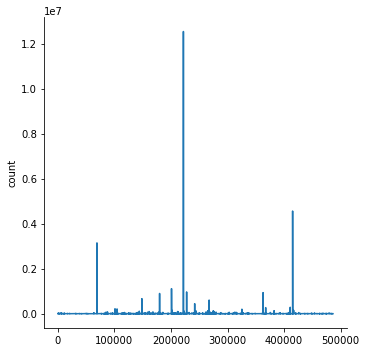

In [6]:
sns.relplot(x=p["count"].index, y=p["count"], kind="line")

In [22]:
with open("histogram.json", "r") as f:
        histogram_data = json.load(f)


In [2]:
# Create a gene annotation bed file
# /mnt/d/datoteke/programming/mag/pDG_MvspDG7_M/data# cat annotation.gtf |  awk 'OFS="\t" {if ($3=="gene") {print $1,$4-1,$5,$10,$16,$7}}' | tr -d '";' > gene_annotation.bed
def determine_color(strand):
    if strand == "+":
        return "rgb(255,51,51)"
    else:
        return "rgb(0,153,204)"

path = Path("../../mag/pDG_MvspDG7_M/data/gene_annotation.bed")
annot = pd.read_csv(path, sep="\t", header=None, names=["chr", "start", "end", "name", "type", "strand"])
annot = annot.drop(columns="type")
annot = annot.loc[annot["strand"] == "+"]
annot["strand"] = annot["strand"].apply(determine_color)
annot = annot.rename(columns = {"strand":"color", "chr":"block_id"})

parsed = json.loads(annot.to_json(orient="records"))
with open("annotation_pos.json", "w") as f:
    json.dump(parsed, f, indent=4)
annot

block_id   start     end             name           color
0     NZ_CP051858.1     623    1247    HIS92_RS00005  rgb(255,51,51)
1     NZ_CP051858.1    1424    1781    HIS92_RS00010  rgb(255,51,51)
2     NZ_CP051858.1    1915    2368    HIS92_RS00015  rgb(255,51,51)
6     NZ_CP051858.1    5540    5729    HIS92_RS00035  rgb(255,51,51)
11    NZ_CP051858.1    9487   10129    HIS92_RS00060  rgb(255,51,51)
...             ...     ...     ...              ...             ...
5246  NZ_CP051859.1  232113  232461    HIS92_RS26240  rgb(255,51,51)
5247  NZ_CP051859.1  232479  234060    HIS92_RS26245  rgb(255,51,51)
5248  NZ_CP051859.1  234075  234837    HIS92_RS26250  rgb(255,51,51)
5249  NZ_CP051859.1  234993  235425  HIS92_RS24925.0  rgb(255,51,51)
5250  NZ_CP051859.1       0     759  HIS92_RS24925.1  rgb(255,51,51)

[2629 rows x 5 columns]

In [3]:

path = Path("../../mag/pDG_MvspDG7_M/data/gene_annotation.bed")
annot = pd.read_csv(path, sep="\t", header=None, names=["chr", "start", "end", "name", "type", "strand"])
annot = annot.drop(columns="type")
annot = annot.loc[annot["strand"] == "-"]
annot["strand"] = annot["strand"].apply(determine_color)
annot = annot.rename(columns = {"strand":"color", "chr":"block_id"})

parsed = json.loads(annot.to_json(orient="records"))
with open("annotation_neg.json", "w") as f:
    json.dump(parsed, f, indent=4)
annot

block_id   start     end           name           color
3     NZ_CP051858.1    2759    3590  HIS92_RS00020  rgb(0,153,204)
4     NZ_CP051858.1    3925    4660  HIS92_RS00025  rgb(0,153,204)
5     NZ_CP051858.1    4849    5299  HIS92_RS00030  rgb(0,153,204)
7     NZ_CP051858.1    5757    6884  HIS92_RS00040  rgb(0,153,204)
8     NZ_CP051858.1    6889    7819  HIS92_RS00045  rgb(0,153,204)
...             ...     ...     ...            ...             ...
5202  NZ_CP051859.1  200498  200771  HIS92_RS26020  rgb(0,153,204)
5203  NZ_CP051859.1  200903  201161  HIS92_RS26025  rgb(0,153,204)
5239  NZ_CP051859.1  226460  226985  HIS92_RS26205  rgb(0,153,204)
5240  NZ_CP051859.1  226990  227932  HIS92_RS26210  rgb(0,153,204)
5241  NZ_CP051859.1  228074  229226  HIS92_RS26215  rgb(0,153,204)

[2622 rows x 5 columns]

In [7]:
p = df.loc[df["chr"] == "NZ_CP051858.1"]
p = p.groupby(p.index // 100).sum()

bed_pos = {}

LENGTH = {"NZ_CP051858.1": 4865236, "NZ_CP051859.1": 235425}
bed_pos["block_id"] = ["NZ_CP051858.1" for i in range(0, LENGTH["NZ_CP051858.1"], 100)]
bed_pos["start"] = [i for i in range(0, LENGTH["NZ_CP051858.1"], 100)]
bed_pos["end"] = [i + 100 for i in range(0, LENGTH["NZ_CP051858.1"], 100)]
bed_pos["end"][-1] = LENGTH["NZ_CP051858.1"]
data = pd.DataFrame(bed_pos)
data["value"] = p["count"]

data["value"] = data["value"] + 1
data["value"] = data["value"].apply(np.log2)

parsed = json.loads(data.to_json(orient="records"))
with open("histogram_log.json", "w") as f:
    json.dump(parsed, f, indent=4)